In [128]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [106]:
df = pd.read_csv('datos_exportados_clean.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [107]:
df

,Fecha,Latitud,Longitud,SST
0,1981-09-01,19.875,-117.125,NaN
1,1981-09-01,20.125,-117.125,NaN
2,1981-09-01,20.375,-117.125,NaN
3,1981-09-01,20.625,-117.125,NaN
4,1981-09-01,20.875,-117.125,NaN
...,...,...,...,...
1319271,2023-12-01,30.875,-104.125,NaN
1319272,2023-12-01,31.125,-104.125,NaN
1319273,2023-12-01,31.375,-104.125,NaN
1319274,2023-12-01,31.625,-104.125,NaN


In [108]:
df.count()

Fecha       1319276
Latitud     1319276
Longitud    1319276
SST          186436
dtype: int64

In [109]:
df.dropna(inplace=True)

In [110]:
df.count()

Fecha       186436
Latitud     186436
Longitud    186436
SST         186436
dtype: int64

In [111]:
# Filtramos el dataset para la latitud y longitud específica
lat = 22.625
lon = -107.125

df_filtered = df[(df['Latitud'] == lat) & (df['Longitud'] == lon)]

In [112]:
df_filtered

,Fecha,Latitud,Longitud,SST
1971,1981-09-01,22.625,-107.125,28.87767
4568,1981-10-01,22.625,-107.125,28.74871
7165,1981-11-01,22.625,-107.125,26.99600
9762,1981-12-01,22.625,-107.125,25.58290
12359,1982-01-01,22.625,-107.125,23.63032
...,...,...,...,...
1308262,2023-08-01,22.625,-107.125,30.16355
1310859,2023-09-01,22.625,-107.125,30.26433
1313456,2023-10-01,22.625,-107.125,30.42323
1316053,2023-11-01,22.625,-107.125,27.76800


In [113]:
for i in range(1, 13):  # Crear 3 columnas retrasadas como ejemplo
    df_filtered[f'SST_Lag{i}'] = df_filtered['SST'].shift(i)

# Eliminar filas con valores NaN creados por el desplazamiento
df.dropna(inplace=True)

# Configuración de la ventana deslizante
window_size = 12
prediction_step = 1
train_start = 0
train_end = train_start + window_size

# Predicciones
predictions = []
actual = []

C:\Users\52341\AppData\Local\Temp\ipykernel_25720\2459466538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'SST_Lag{i}'] = df_filtered['SST'].shift(i)
C:\Users\52341\AppData\Local\Temp\ipykernel_25720\2459466538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'SST_Lag{i}'] = df_filtered['SST'].shift(i)
C:\Users\52341\AppData\Local\Temp\ipykernel_25720\2459466538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [114]:
df_filtered

,Fecha,Latitud,Longitud,SST,SST_Lag1,SST_Lag2,SST_Lag3,SST_Lag4,SST_Lag5,SST_Lag6,SST_Lag7,SST_Lag8,SST_Lag9,SST_Lag10,SST_Lag11,SST_Lag12
1971,1981-09-01,22.625,-107.125,28.87767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,1981-10-01,22.625,-107.125,28.74871,28.87767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7165,1981-11-01,22.625,-107.125,26.99600,28.74871,28.87767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9762,1981-12-01,22.625,-107.125,25.58290,26.99600,28.74871,28.87767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12359,1982-01-01,22.625,-107.125,23.63032,25.58290,26.99600,28.74871,28.87767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308262,2023-08-01,22.625,-107.125,30.16355,29.06064,27.30500,26.03871,23.84967,23.02097,22.23750,23.75677,25.15903,27.65600,29.73290,30.01700,30.33581
1310859,2023-09-01,22.625,-107.125,30.26433,30.16355,29.06064,27.30500,26.03871,23.84967,23.02097,22.23750,23.75677,25.15903,27.65600,29.73290,30.01700
1313456,2023-10-01,22.625,-107.125,30.42323,30.26433,30.16355,29.06064,27.30500,26.03871,23.84967,23.02097,22.23750,23.75677,25.15903,27.65600,29.73290
1316053,2023-11-01,22.625,-107.125,27.76800,30.42323,30.26433,30.16355,29.06064,27.30500,26.03871,23.84967,23.02097,22.23750,23.75677,25.15903,27.65600


In [115]:
while train_end + prediction_step - 1 < len(df):
    # Datos de entrenamiento y prueba
    train_data = df_filtered.iloc[train_start:train_end]
    test_data = df_filtered.iloc[train_end + prediction_step - 1:train_end + prediction_step]

    # Asegurarse de que estamos en el rango de fechas deseado (2020-2023)
    if test_data['Fecha'].dt.year.values[0] < 2015:
        train_start += 1
        train_end += 1
        continue
    if test_data['Fecha'].dt.year.values[0] > 2019:
        break

    # Características y variable objetivo
    features = [f'SST_Lag{i}' for i in range(1, 13)]
    X_train = train_data[features]
    y_train = train_data['SST']
    X_test = test_data[features]

    # Entrenamiento del modelo
    model = RandomForestRegressor(n_estimators=50)
    model.fit(X_train, y_train)

    # Predicción
    pred = model.predict(X_test)
    predictions.append(pred[0])
    actual.append(test_data['SST'].values[0])

    # Mover la ventana
    train_start += 1
    train_end += 1

In [116]:

resultados = pd.DataFrame({
    'Prediccion_SST': predictions
})
        

In [117]:
resultados.to_csv("output_rndForestprueba.csv", index=False)

df_adjust = df_filtered[(df_filtered["Fecha"] >= '2015-01-01') & (df_filtered['Fecha'] < '2020-01-01')]

df_adjust = df_adjust.reset_index(drop=True)

df_adjust = pd.DataFrame(df_adjust)

In [118]:
df_adjust.to_csv('FechasComparar.csv', index=False)

In [121]:
mse = mean_squared_error(actual, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.7935792742469824


In [122]:
resultados = pd.read_csv("output_rndForestprueba.csv")
# Asumiendo que data['SST'] son tus observaciones reales y y_ts_pred son tus predicciones.
df_adjust = pd.read_csv('FechasComparar.csv')

In [123]:
resultados.insert(0, 'Fecha', df_adjust['Fecha'])

print((resultados))
"""# Convertir año y mes a una fecha (primer día de cada mes)
sst_promedio_mensual['Fecha'] = pd.to_datetime(sst_promedio_mensual['Año'].astype(str) + '-' +
                                               sst_promedio_mensual['Mes'].astype(str) + '-01')
"""
df_adjust['Fecha'] = pd.to_datetime(df_adjust['Fecha'])
resultados['Fecha'] = pd.to_datetime(resultados['Fecha'])


         Fecha  Prediccion_SST
0   2015-01-01       24.925339
1   2015-02-01       24.583182
2   2015-03-01       24.260370
3   2015-04-01       26.053307
4   2015-05-01       26.932322
5   2015-06-01       28.267202
6   2015-07-01       29.409487
7   2015-08-01       29.704583
8   2015-09-01       29.579087
9   2015-10-01       28.829098
10  2015-11-01       28.283101
11  2015-12-01       26.188398
12  2016-01-01       25.016617
13  2016-02-01       24.769533
14  2016-03-01       24.889200
15  2016-04-01       25.454461
16  2016-05-01       26.094044
17  2016-06-01       28.221954
18  2016-07-01       29.253408
19  2016-08-01       30.159376
20  2016-09-01       29.915616
21  2016-10-01       29.592417
22  2016-11-01       28.821178
23  2016-12-01       27.129114
24  2017-01-01       25.079466
25  2017-02-01       24.537074
26  2017-03-01       24.026389
27  2017-04-01       24.475020
28  2017-05-01       26.280585
29  2017-06-01       27.624497
30  2017-07-01       29.169919
31  2017

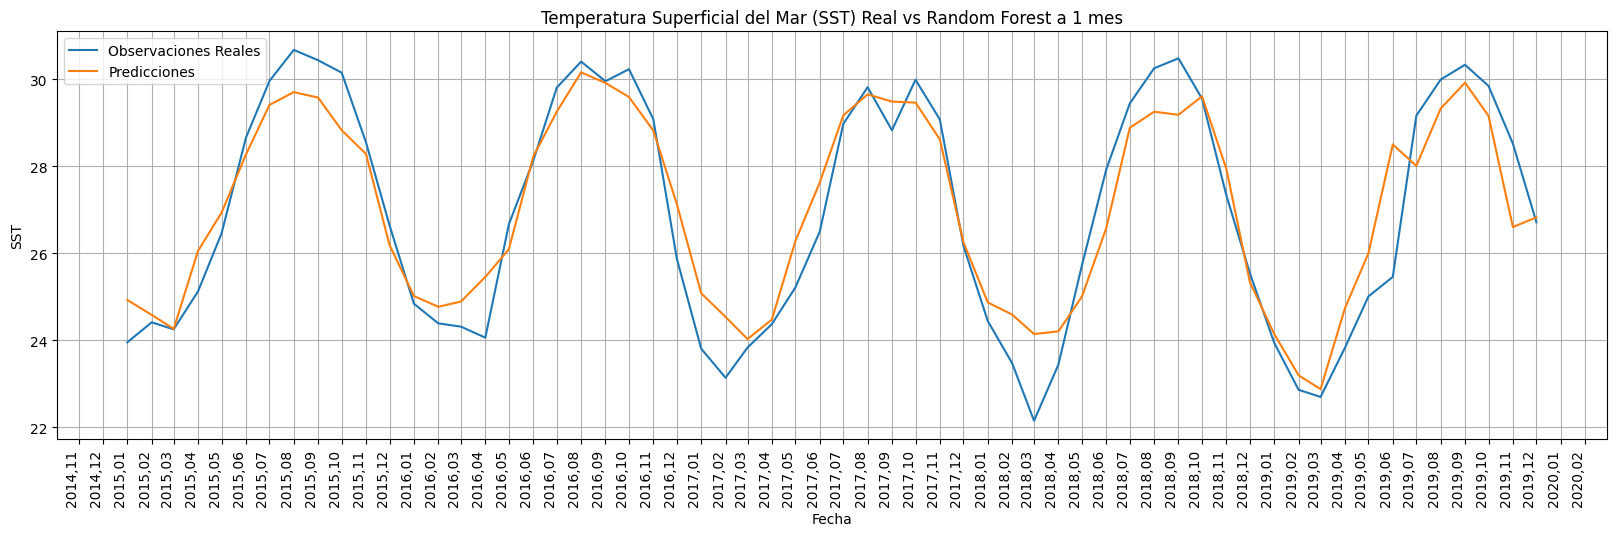

In [124]:
# Gráfico
plt.figure(figsize=(20, 6))
plt.plot(df_adjust['Fecha'], df_adjust['SST'],linestyle='-', label='Observaciones Reales')
plt.plot(df_adjust['Fecha'], resultados['Prediccion_SST'],  linestyle='-', label='Predicciones')
plt.title('Temperatura Superficial del Mar (SST) Real vs Random Forest a 1 mes')
plt.xlabel('Fecha')
plt.ylabel('SST')
plt.legend()

# Formatear el eje x para mostrar cada año
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y,%m'))
plt.gcf().autofmt_xdate()  # Auto-rotar las fechas para que sean legibles
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [134]:
meanPred = np.mean(np.abs(resultados['Prediccion_SST']))

In [135]:
meanReal = np.mean(np.abs(df_adjust['SST']))

In [136]:
print("Error promedio de la temperatura predicha", meanPred)
print("Error promedio de la temperatura real", meanReal)
print(np.abs(meanReal-meanPred))

Error promedio de la temperatura predicha 26.998159746666666
Error promedio de la temperatura real 26.913928499999997
0.08423124666666837
